In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db',
                                     mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100)

05/30/2020 18:48:22 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 18:49:29 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 18:49:48 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 18:50:07 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 18:50:23 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

In [7]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=500, blocks_batch_size=8,
                    blocks_filter=affvids_db.inference_filter(training=True))

05/30/2020 19:15:19 [Epoch 1] (29567ms) Posterior free-energy 8.79886664e+10
05/30/2020 19:15:19 Saving checkpoint...
05/30/2020 19:15:45 [Epoch 2] (25904ms) Posterior free-energy 8.28539535e+10
05/30/2020 19:16:11 [Epoch 3] (26022ms) Posterior free-energy 7.79460772e+10
05/30/2020 19:16:37 [Epoch 4] (26002ms) Posterior free-energy 7.48474450e+10
05/30/2020 19:17:03 [Epoch 5] (26032ms) Posterior free-energy 7.21257923e+10
05/30/2020 19:17:29 [Epoch 6] (26057ms) Posterior free-energy 7.03564513e+10
05/30/2020 19:17:55 [Epoch 7] (26057ms) Posterior free-energy 6.91425608e+10
05/30/2020 19:18:21 [Epoch 8] (26076ms) Posterior free-energy 6.80461476e+10
05/30/2020 19:18:47 [Epoch 9] (26167ms) Posterior free-energy 6.73133609e+10
05/30/2020 19:19:14 [Epoch 10] (26206ms) Posterior free-energy 6.65747046e+10
05/30/2020 19:19:40 [Epoch 11] (26224ms) Posterior free-energy 6.59284910e+10
05/30/2020 19:20:06 [Epoch 12] (26210ms) Posterior free-energy 6.53879419e+10
05/30/2020 19:20:32 [Epoch 13] (

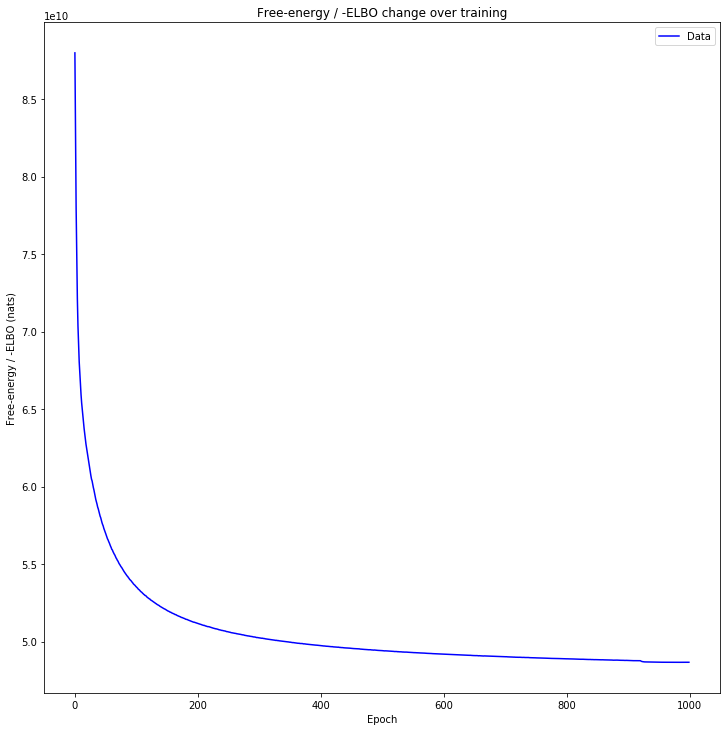

In [8]:
utils.plot_losses(losses)

In [9]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [16]:
def subject_labeler(b):
    return str(b.subject)

05/31/2020 02:31:42 Plotting factors for Participant 5, run 1


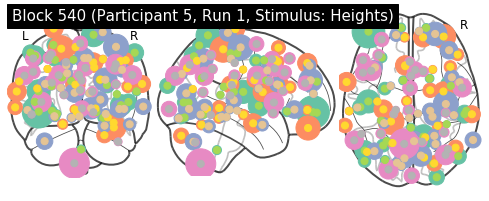

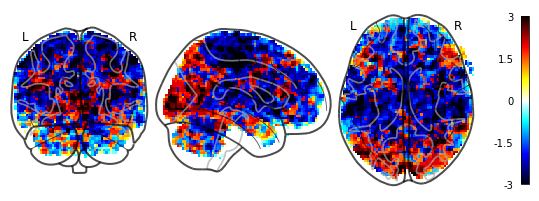

05/31/2020 02:31:46 Reconstruction Error (Frobenius Norm): 1.40264392e+03 out of 1.44923120e+03


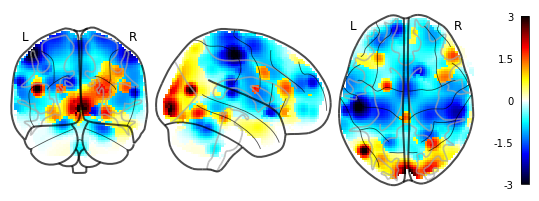

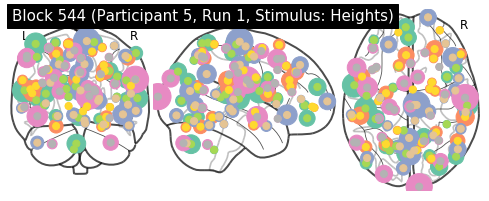

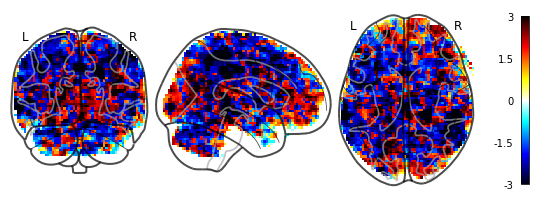

05/31/2020 02:31:51 Reconstruction Error (Frobenius Norm): 1.43853906e+03 out of 1.41792493e+03


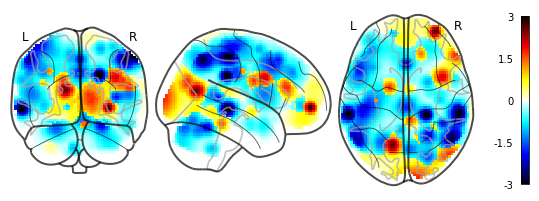

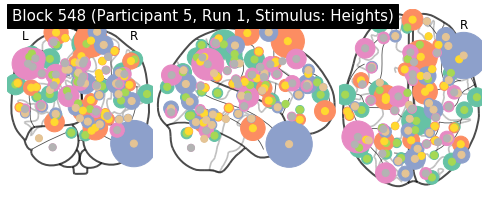

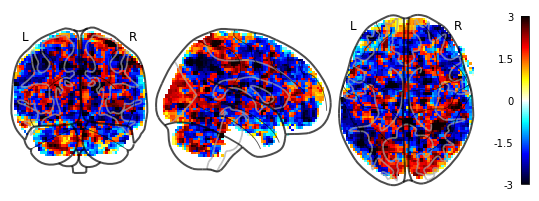

05/31/2020 02:31:55 Reconstruction Error (Frobenius Norm): 1.30473889e+03 out of 1.33101880e+03


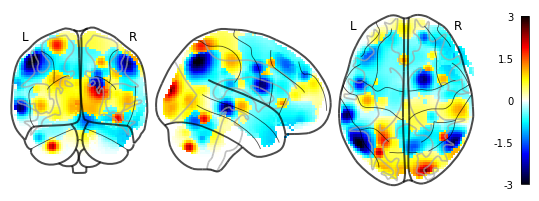

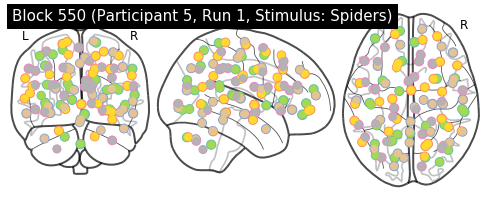

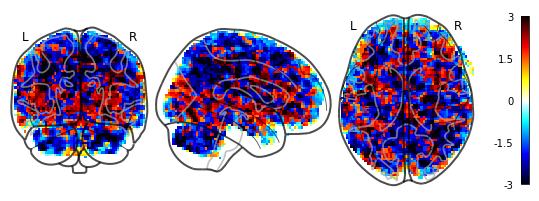

05/31/2020 02:31:59 Reconstruction Error (Frobenius Norm): 1.32499158e+03 out of 1.34157849e+03


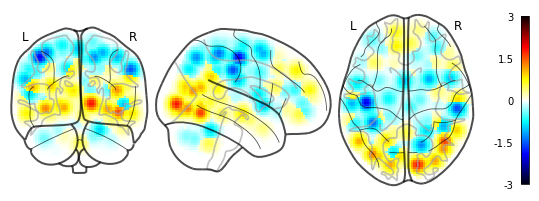

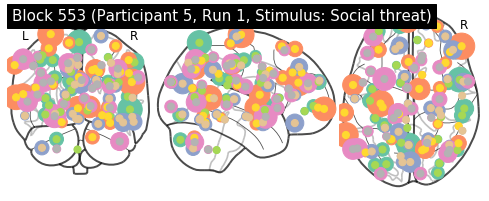

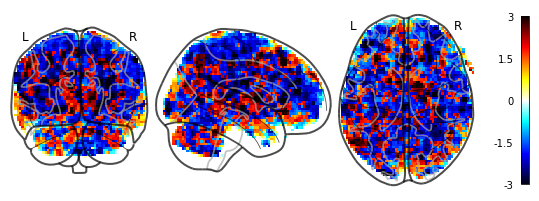

05/31/2020 02:32:03 Reconstruction Error (Frobenius Norm): 1.36262537e+03 out of 1.29898389e+03


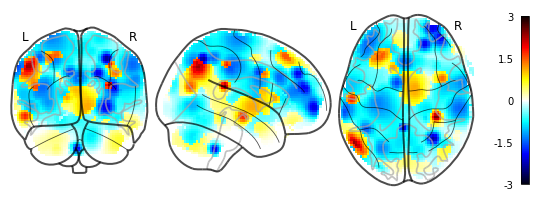

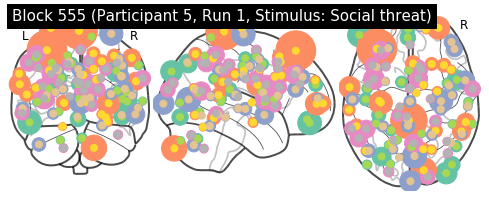

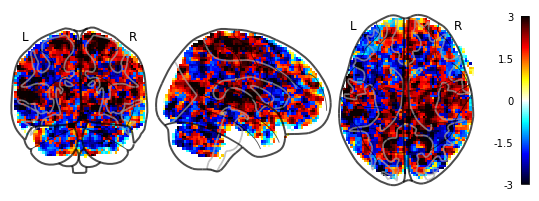

05/31/2020 02:32:08 Reconstruction Error (Frobenius Norm): 1.60393848e+03 out of 1.50777368e+03


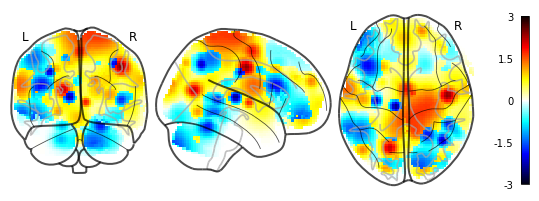

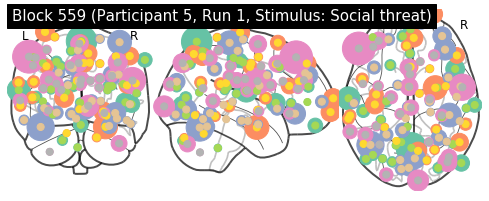

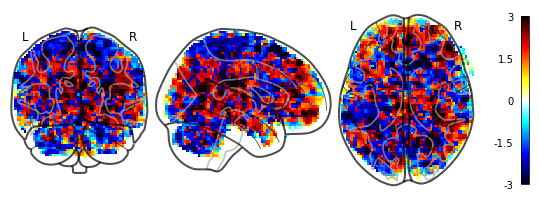

05/31/2020 02:32:12 Reconstruction Error (Frobenius Norm): 1.35511951e+03 out of 1.32933044e+03


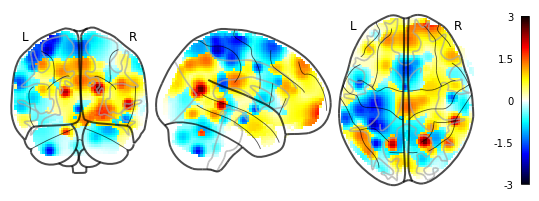

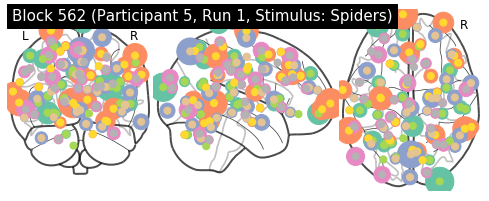

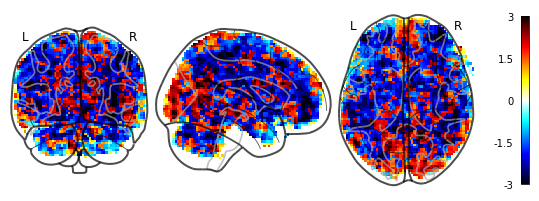

05/31/2020 02:32:16 Reconstruction Error (Frobenius Norm): 1.24312378e+03 out of 1.28306104e+03


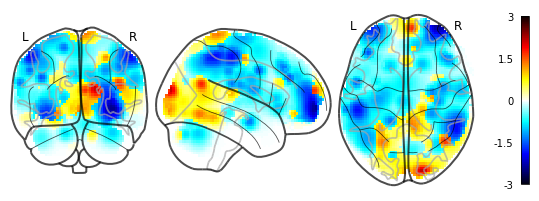

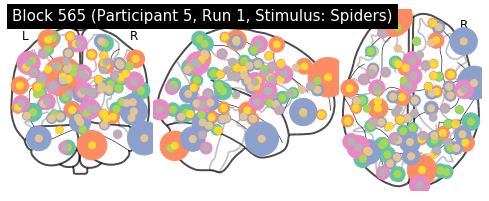

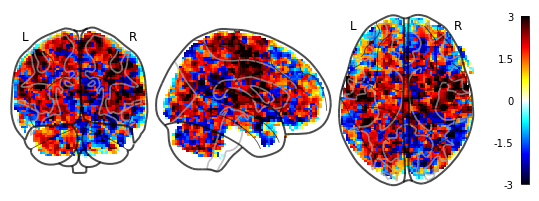

05/31/2020 02:32:20 Reconstruction Error (Frobenius Norm): 1.44705066e+03 out of 1.37555957e+03


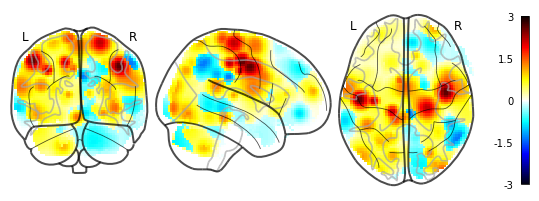

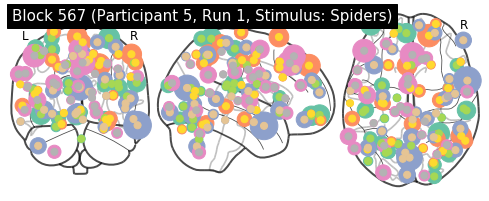

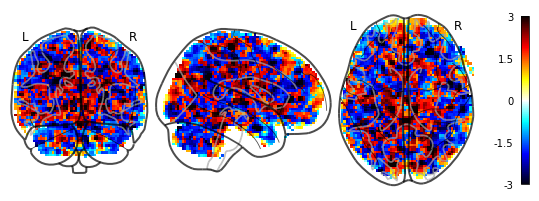

05/31/2020 02:32:25 Reconstruction Error (Frobenius Norm): 1.41861792e+03 out of 1.47625427e+03


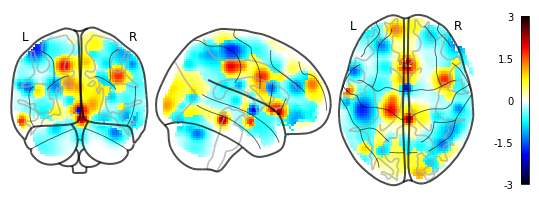

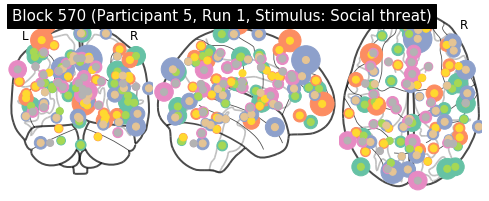

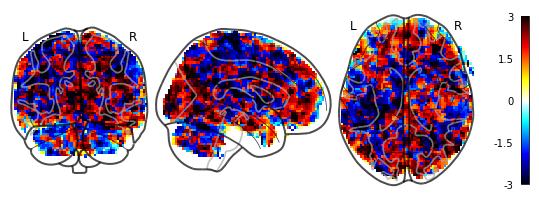

05/31/2020 02:32:29 Reconstruction Error (Frobenius Norm): 1.39305176e+03 out of 1.59022388e+03


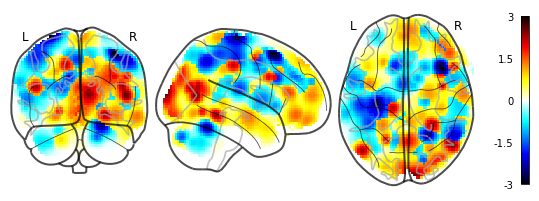

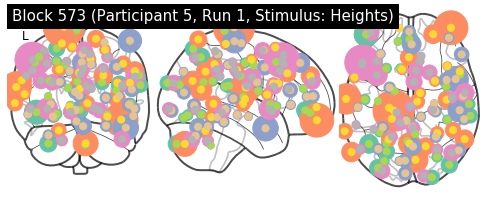

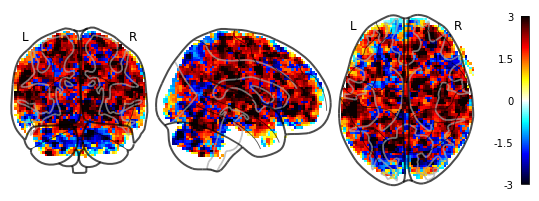

05/31/2020 02:32:33 Reconstruction Error (Frobenius Norm): 1.64202759e+03 out of 1.38468726e+03


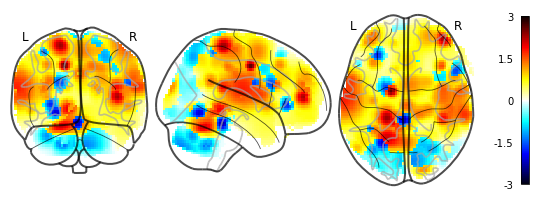

In [10]:
subject_runs = set([(block.subject, block.run) for block in htfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in htfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = htfa._blocks.index(block)
        htfa.plot_factor_centers(index, labeler=task_labeler)
        htfa.plot_original_brain(index)
        htfa.plot_reconstruction(index)


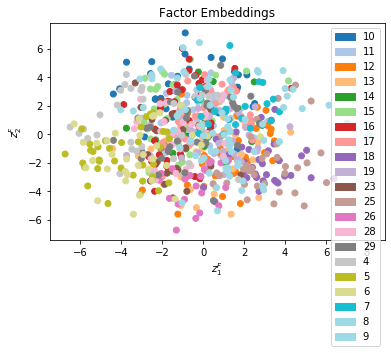

In [17]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=subject_labeler,embedding='PCA')

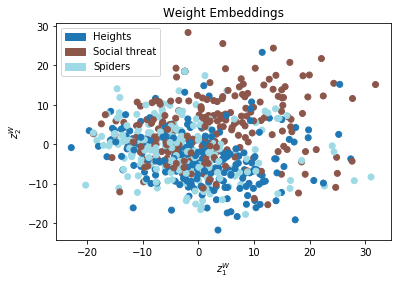

In [12]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='PCA')

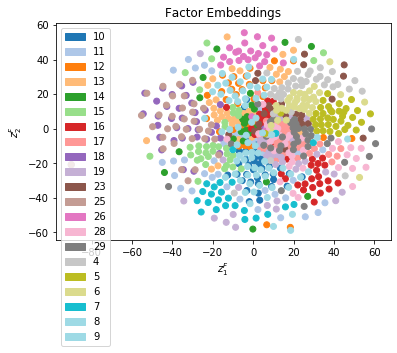

In [18]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=subject_labeler,embedding='TSNE')

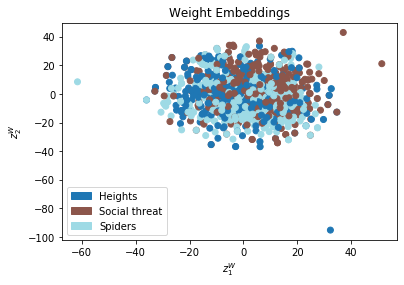

In [14]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='TSNE')

In [15]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=affvids_db.inference_filter(training=True))

05/31/2020 02:33:26 Average reconstruction error (MSE): 1.20424481e+03 +/- 4.68000420e+01
05/31/2020 02:33:26 Average data norm (Euclidean): 1.41246503e+03 +/- 8.13384654e+01
05/31/2020 02:33:26 Percent average reconstruction error: 85.389076 +/- 3.04229234e+00


(array([1231.1505127 , 1157.32507324, 1258.60400391, 1244.84716797,
        1211.50939941, 1259.4050293 , 1155.52075195, 1238.10144043,
        1209.88061523, 1194.99536133, 1256.78723145, 1270.53869629,
        1168.84924316, 1213.81762695, 1239.44702148, 1186.61132812,
        1218.90661621, 1214.4050293 , 1227.93444824, 1224.68322754,
        1225.93359375, 1235.14660645, 1219.70373535, 1231.4979248 ,
        1216.03662109, 1278.82763672, 1176.74780273, 1284.65148926,
        1274.1126709 , 1267.77636719, 1242.21655273, 1214.33337402,
        1190.96765137, 1191.9987793 , 1195.54870605, 1230.6751709 ,
        1170.70996094, 1226.24133301, 1188.04370117, 1143.46325684,
        1212.21472168, 1310.96826172, 1203.66210938, 1194.59472656,
        1300.18566895, 1365.62890625, 1199.65563965, 1184.86486816,
        1130.03417969, 1190.39221191, 1222.17163086, 1206.4185791 ,
        1305.19226074, 1195.26953125, 1252.68078613, 1215.63879395,
        1168.86706543, 1187.76037598, 1144.78540